<a href="https://colab.research.google.com/github/azharthegeek/01_Python_Introduction/blob/main/MNIST_Streamlit/MNIST%20old%20with%20some%20bad%20accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

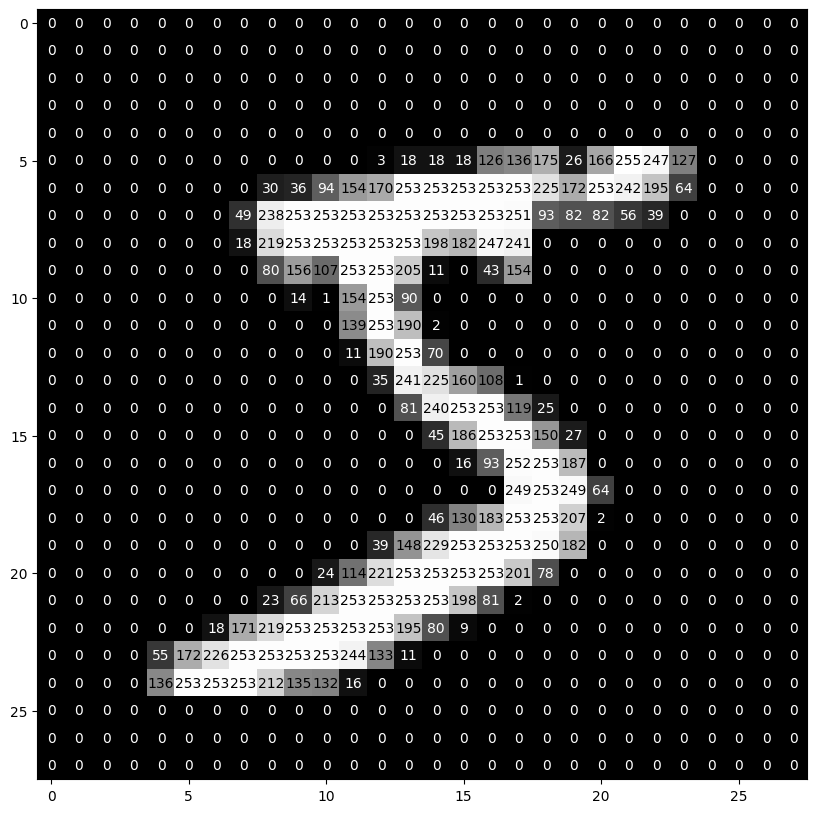

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
visualize_input(x_train[0], ax)
plt.show()

In [6]:
print(y_train)
print(y_test)

[5 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]


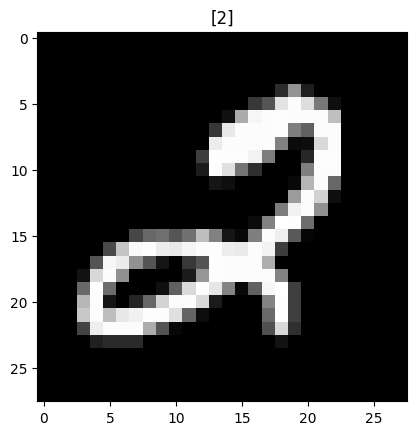

In [7]:
# lets see some random images and its labels
import random
import matplotlib.pyplot as plt
i = random.randint(0,60000)
plt.imshow(x_train[i],cmap='gray') # Color map
plt.title([y_train[i]])
plt.show()

In [8]:
# How many images are there in every digit?
import numpy as np
np.unique(y_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [9]:
np.unique(y_test,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))

In [10]:
# Normalization : Scaling down the value to a specific range(0-1)
x_train=x_train/255
x_test = x_test/255

In [11]:
# AFter Normalization
print(x_train.max())
print(x_train.min())

1.0
0.0


In [12]:
from keras.layers import Dense
from keras.layers import Flatten
model = keras.models.Sequential()
model.add(Flatten(input_shape=(28,28))) # 784
model.add(Dense(392,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [13]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
history = model.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 14s 6ms/step - loss: 0.2322 - accuracy: 0.9322 - val_loss: 0.1242 - val_accuracy: 0.9628
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0951 - accuracy: 0.9710 - val_loss: 0.0956 - val_accuracy: 0.9703
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0605 - accuracy: 0.9816 - val_loss: 0.0799 - val_accuracy: 0.9763
Epoch 4/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0430 - accuracy: 0.9865 - val_loss: 0.0895 - val_accuracy: 0.9733
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0304 - accuracy: 0.9908 - val_loss: 0.0802 - val_accuracy: 0.9769
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0233 - accuracy: 0.9927 - val_loss: 0.0936 - val_accuracy: 0.9758
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0172 - accuracy: 0.9949 - val_loss: 0.0954 - val_accuracy

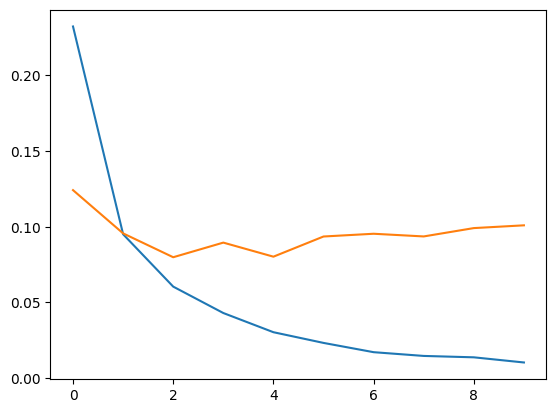

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

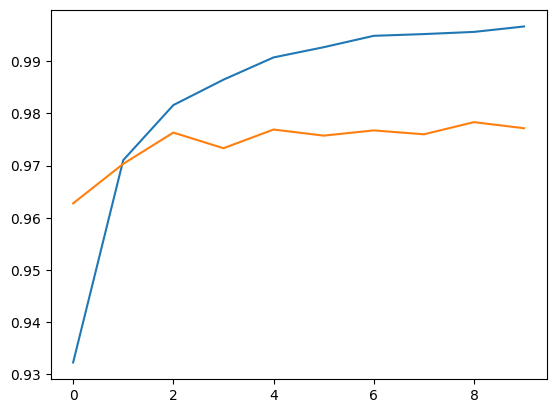

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [17]:
# Evaluate on test data

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [18]:
from keras.preprocessing import image

In [42]:
# img = image.load_img(path="/content/077.png", color_mode= 'grayscale', target_size=(28, 28))
# img = image.img_to_array(img)
# plt.imshow(image.array_to_img(img), cmap="gray")
# img = img.astype('float')/255
# test_img = img.reshape((1, 28, 28, 1))
# #img_class = model.predict_classes(test_img)
# img_class = np.argmax(model.predict(test_img), axis = 1)
# prediction = img_class[0]

In [43]:
# prediction

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [28]:
accuracy_score(y_pred,y_test)

0.9799

In [29]:
confusion_matrix(y_pred,y_test)

array([[ 972,    4,   10,    2,    2,    2,    4,    1,    1,    2],
       [   1, 1124,    1,    0,    0,    0,    2,    1,    0,    2],
       [   1,    1,  993,    0,    0,    0,    0,    5,    2,    0],
       [   1,    0,    5,  993,    1,   12,    1,    1,    7,    5],
       [   1,    0,    4,    0,  956,    1,    3,    1,    2,    4],
       [   1,    0,    0,    5,    1,  864,    2,    0,    2,    4],
       [   1,    2,    3,    0,    5,    7,  946,    0,    0,    1],
       [   1,    1,    7,    6,    1,    0,    0, 1011,    4,    1],
       [   1,    3,    9,    3,    2,    4,    0,    2,  953,    3],
       [   0,    0,    0,    1,   14,    2,    0,    6,    3,  987]])

In [30]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1000
           1       0.99      0.99      0.99      1131
           2       0.96      0.99      0.98      1002
           3       0.98      0.97      0.98      1026
           4       0.97      0.98      0.98       972
           5       0.97      0.98      0.98       879
           6       0.99      0.98      0.98       965
           7       0.98      0.98      0.98      1032
           8       0.98      0.97      0.98       980
           9       0.98      0.97      0.98      1013

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [31]:
model.save("mnist.hdf5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
